In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Брезенхем
def bresenham(x0, y0, x1, y1):
    points = []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while True:
        points.append((x0, y0))
        if x0 == x1 and y0 == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy

    return points

# Естественный способ
def naive_line(x0, y0, x1, y1):
    points = []
    dx = x1 - x0
    dy = y1 - y0

    if abs(dx) > abs(dy):
        if x0 > x1:
            x0, y0, x1, y1 = x1, y1, x0, y0
        for x in range(x0, x1 + 1):
            t = (x - x0) / (x1 - x0)
            y = y0 + t * (y1 - y0)
            points.append((x, round(y)))
    else:
        if y0 > y1:
            x0, y0, x1, y1 = x1, y1, x0, y0
        for y in range(y0, y1 + 1):
            t = (y - y0) / (y1 - y0)
            x = x0 + t * (x1 - x0)
            points.append((round(x), y))
    return points

# Исходные точки отрезка
x0, y0 = 8, 4
x1, y1 = 90, 92

# Получаем пиксели
bres_points = bresenham(x0, y0, x1, y1)
naive_points = naive_line(x0, y0, x1, y1)

# Визуализация
plt.figure(figsize=(8, 8))
plt.title("Брезенхем vs. Уравнение прямой")

# Рисуем сетку
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.xticks(np.arange(0, 100, 1))
plt.yticks(np.arange(0, 100, 1))
plt.gca().set_aspect('equal')
plt.xlim(0, 100)
plt.ylim(0, 100)

# Брезенхем — красные точки
for (x, y) in bres_points:
    plt.gca().add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, color='red', alpha=0.6, label='Брезенхем' if (x, y) == bres_points[0] else ""))

# Естественный способ — синие точки
for (x, y) in naive_points:
    plt.gca().add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, color='blue', alpha=0.3, label='Уравнение' if (x, y) == naive_points[0] else ""))

# Начальная и конечная точки
plt.plot([x0], [y0], 'ko', label="Начало")
plt.plot([x1], [y1], 'ko', label="Конец")

plt.legend()
plt.show()


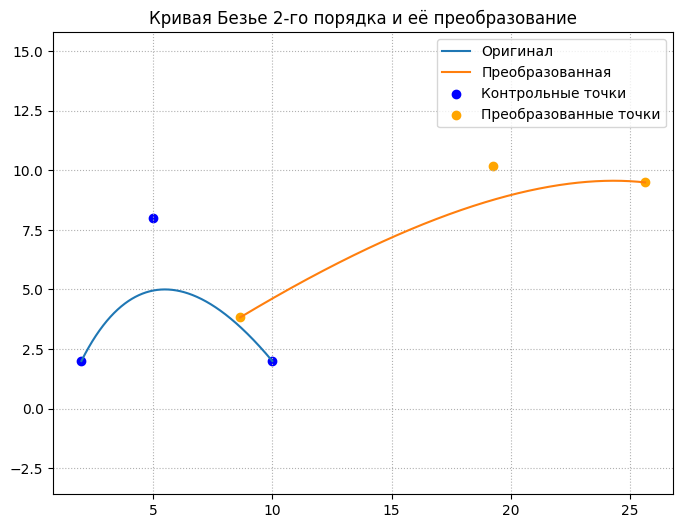

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Кривая Безье 2-го порядка: 3 опорные точки
P0 = np.array([2, 2])
P1 = np.array([5, 8])
P2 = np.array([10, 2])

# t от 0 до 1
t = np.linspace(0, 1, 500).reshape(-1, 1)

# Формула Безье 2-го порядка
def bezier_quad(P0, P1, P2, t):
    return (1 - t)**2 * P0 + 2 * (1 - t) * t * P1 + t**2 * P2

curve = bezier_quad(P0, P1, P2, t)

# Преобразования: масштабирование (×2), shear по x (hx = 2), поворот на π/4, перенос на (3, 1)
theta = np.pi / 4
T = np.array([
    [1, 0, 3],     # перенос
    [0, 1, 1],
    [0, 0, 1]
])
Shx = np.array([
    [1, 2, 0],     # shear по x (2)
    [0, 1, 0],
    [0, 0, 1]
])
R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0, 0, 1]
])

# Полная матрица
A = T @ Shx @ R

# Опорные точки в однородных координатах
P = np.stack([P0, P1, P2], axis=0)
P_hom = np.hstack([P, np.ones((3,1))])        # 3x3

# Преобразуем опорные точки
P_transformed = (A @ P_hom.T).T               # 3x3 → 3x3

# Считаем кривую по новым точкам
P0_t, P1_t, P2_t = P_transformed[:, :2]
curve_t = bezier_quad(P0_t, P1_t, P2_t, t)

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(curve[:, 0], curve[:, 1], label="Оригинал", color="tab:blue")
plt.plot(curve_t[:, 0], curve_t[:, 1], label="Преобразованная", color="tab:orange")
plt.scatter(*P.T, color="blue", label="Контрольные точки")
plt.scatter(*P_transformed[:, :2].T, color="orange", label="Преобразованные точки")
plt.legend()
plt.grid(True, linestyle=':')
plt.axis('equal')
plt.title("Кривая Безье 2-го порядка и её преобразование")
plt.show()
